## Problem set 1, Intro to NLP 2018

#### This is due on September 25, 2018, submitted electronically. 100 points total.

##### How to do this problem set:

- What version of Python should I use? 3.6!

- Most of these questions require writing Python code and computing results, and the rest of them have textual answers. To generate the answers, you will have to fill out a supporting file, `hw1.py`.

- For all of the textual answers you have to fill out have placeholder text which says "Answer in one or two sentences here." For each question, you need to replace "Answer in one or two sentences here" with your answer.

- Write all the answers in this ipython notebook. Once you are finished (1) Generate a PDF via (File -> Download As -> PDF) and upload to Gradescope (2)Turn in `hw_1.py` and `hw_1.ipynb` on Moodle.
  
- **Important** check your PDF before you turn it in to gradescope to make sure it exported correctly. If ipython notebook gets confused about your syntax it will sometimes terminate the PDF creation routine early. If your whole PDF does not print, try running `$jupyter nbconvert --to pdf 2018hw1.ipynb` to identify and fix any syntax errors that might be causing problems

- When creating your final version of the PDF to hand in, please do a fresh restart and execute every cell in order. Then you'll be sure it's actually right. One handy way to do this is by clicking `Cell -> Run All` in the notebook menu.
 
- This assignment is designed so that you can run all cells in a few minutes of computation time. If it is taking longer than that, you probably have made a mistake in your code.

##### Academic honesty 

- We will audit the Moodle code from a set number of students, chosen at random. The audits will check that the code you wrote and turned on Moodle generates the answers you turn in on your PDF. If you turn in correct answers on your PDF without code that actually generates those answers, we will consider this a serious case of cheating. See the course page for honesty policies.

- We will also run automatic checks of code on Moodle for plagiarism. Copying code from others is also considered a serious case of cheating.

In [1]:
# Run this cell! It sets some things up for you.

# This code makes plots appear inline in this document rather than in a new window.
import matplotlib.pyplot as plt
from __future__ import division  # this line is important to avoid unexpected behavior from division

# This code imports your work from hw_1.py
from hw_1 import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (5, 4) # set default size of plots

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
# download the IMDB large movie review corpus from https://people.cs.umass.edu/~miyyer/cs585/homeworks/data/large_movie_review_dataset.zip to a file location on your computer

PATH_TO_DATA = 'Dataset\large_movie_review_dataset'  # set this variable to point to the location of the IMDB corpus on your computer
POS_LABEL = 'pos'
NEG_LABEL = 'neg'
TRAIN_DIR = os.path.join(PATH_TO_DATA, "train")
TEST_DIR = os.path.join(PATH_TO_DATA, "test")

for label in [POS_LABEL, NEG_LABEL]:
    if len(os.listdir(TRAIN_DIR + "/" + label)) == 12500:
        print ("Great! You have 12500 {} reviews in {}".format(label, TRAIN_DIR + "/" + label))
    else:
        print ("Oh no! Something is wrong. Check your code which loads the reviews")

Great! You have 12500 pos reviews in Dataset\large_movie_review_dataset\train/pos
Great! You have 12500 neg reviews in Dataset\large_movie_review_dataset\train/neg


In [3]:
# Actually reading the data you are working with is an important part of NLP! Let's look at one of these reviews

print (open(TRAIN_DIR + "/neg/98_1.txt").read())

I received this movie as a gift, I knew from the DVD cover, this movie are going to be bad.After not watching it for more than a year I finally watched it. what a pathetic movie.<br /><br />I almost didn't finish watching this bad movie,but it will be unfair of me to write a review without watching the complete movie.<br /><br />Trust me when I say " this movie sucks" I am truly shocked that some bad filmmaker wane bee got even financed to make this pathetic movie, But it couldn't have cost more than $20 000 to produce this movie. all you need are a cheap camcorder or a cell phone camera .about 15 people with no acting skills, a scrip that were written by a couple of drunk people.<br /><br />In the fist part of this ultra bad move a reporter (Tara Woodley )run a suppose to be drunk man over on her way to report on a hunted town. He are completely unharmed. They went to a supposed to be abandon house ,but luckily for the it almost complete furnished and a bottle of liquor on the door s

## Part One: Intro to NLP in Python: types, tokens and Zipf's law

#### Types and tokens

One major part of any NLP project is word tokenization. Word tokenization is the task of segmenting text into individual words, called tokens. In this assignment, we will use simple whitespace tokenization. Take a look at the `tokenize_doc` function in `hw_1.py`. **You should not modify tokenize_doc** but make sure you understand what it is doing.

In [4]:
# We have provided a tokenize_doc function in hw_1.py. Here is a short demo of how it works

d1 = "This SAMPLE doc has   words tHat  repeat repeat"
bow = tokenize_doc(d1)

assert bow['this'] == 1
assert bow['sample'] == 1
assert bow['doc'] == 1
assert bow['has'] == 1
assert bow['words'] == 1
assert bow['that'] == 1
assert bow['repeat'] == 2

bow2 = tokenize_doc("CMPSCI 585 is already my favorite class this semester!")
for b in bow2:
    print (b)

already
semester!
this
is
favorite
cmpsci
585
my
class


Now we are going to look at the word types and word tokens in the corpus.
Use the `word_counts` dictionary variable to store the count of each word in the corpus.
Use the `tokenize_doc` function to break documents into tokens. **You should not modify tokenize_doc** but make sure you understand what it is doing.

**Question 1.1 (5 points)**

Complete the cell below to fill out the `word_counts` dictionary variable. `word_counts` keeps track of how many times a word type appears across the corpus. For instance, `word_counts["movie"]` should store the number 61492 -- the count of how many times the word `movie` appears in the corpus.

In [5]:
import glob
import codecs
word_counts = Counter() # Counters are often useful for NLP in python

for label in [POS_LABEL, NEG_LABEL]:
    for directory in [TRAIN_DIR, TEST_DIR]:
        for fn in glob.glob(directory + "/" + label + "/*txt"):
            ## TODO: complete me! 
            doc = codecs.open(fn, 'r', 'utf8') # Open the file with UTF-8 encoding
            bow_each_review = tokenize_doc(doc.read())
            #txt = open(fn).read().decode('utf8')
            #bow_each_review = tokenize_doc(txt)
            for word in bow_each_review:
                word_counts[word] += int(bow_each_review[word])
                       

In [6]:
# you should see 61492 instances of the word type "movie" in the corpus. 
if word_counts["movie"] == 61492:
    print ("yay! there are {} total instances of the word type movie in the corpus".format(word_counts["movie"]))
else:
    print ("hmm. Something seems off. Double check your code")

yay! there are 61492 total instances of the word type movie in the corpus


**Question 1.2 (5 points)**

Take a look at the following values:

In [7]:
print ("there are {} word types in the corpus".format(n_word_types(word_counts)))
print ("there are {} word tokens in the corpus".format(n_word_tokens(word_counts)))

there are 390931 word types in the corpus
there are 11557847 word tokens in the corpus


You should see a much higher number of tokens than types. Why is that?

**Answer:**

Because number of tokens represents number of all words in the corpus containg repeatition of each word but number of types represents number of unique words in the corpus withous considering repeatition of each word (it is our vocabulary size).

**Question 1.3 (5 points)**

Using the word_counts dictionary you just created, make a new dictionary called sorted_dict where the words are sorted according to their counts, in decending order:

In [8]:
# Implement me!
sorted_list = sorted(word_counts.items(),key = operator.itemgetter(1),reverse = True) #sort with respect to value
sorted_dict =  sorted_list 


Now print the first 30 values from sorted_dict. 

In [9]:
# Implement me!
n = 30
#import collections
#print(collections.Counter(sorted_dict).most_common(30))
for k in range(n):
    print sorted_dict[k][0],sorted_dict[k][1]


the 638861
a 316615
and 313637
of 286661
to 264573
is 204876
in 179807
i 141587
this 138483
that 130140
it 129614
/><br 100974
was 93258
as 88242
with 84590
for 84510
but 77864
on 62890
movie 61492
are 57009
his 56870
not 56765
you 55600
film 55086
have 54423
he 51062
be 50901
at 45259
one 44983
by 43359


#### Zipf's Law

**Question 1.4 (5 points)**

In this section, you will verify a key statistical properties of text: [Zipf's Law](https://en.wikipedia.org/wiki/Zipf%27s_law).

Zipf's Law describes the relations between the frequency rank of words and frequency value of words.  For a word $w$, its frequency is inversely proportional to its rank:

$$count_w = K \frac{1}{rank_w}$$
or in other words
$$\log(count_w) = K - \log(rank_w)$$

for some constant $K$, specific to the corpus and how words are being defined.

Therefore, if Zipf's Law holds, after sorting the words descending on frequency, word frequency decreases in an approximately linear fashion under a log-log scale.

Please make such a log-log plot by ploting the rank versus frequency **Hint: Make use of the sorted dictionary you just created.**.  Use a scatter plot where the x-axis is the *log(rank)*, and y-axis is *log(frequency)*.  You should get this information from `word_counts`; for example, you can take the individual word counts and sort them.  dict methods `.items()` and/or `values()` may be useful.  (Note that it doesn't really matter whether ranks start at 1 or 0 in terms of how the plot comes out.) You can check your results by comparing your plots to ones on Wikipedia; they should look qualitatively similar.

*Please remember to label the meaning of the x-axis and y-axis.*

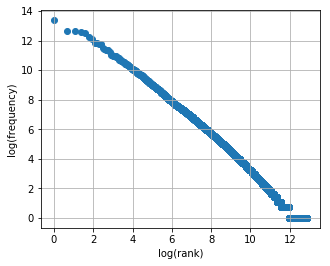

In [10]:
import math
import operator
x = []
y = []
X_LABEL = "log(rank)"
Y_LABEL = "log(frequency)"

for i in range(len(sorted_dict)):
    y.append(math.log(sorted_dict[i][1]))
    x.append(math.log(i+1))


# implement me! you should fill the x and y arrays. Add your code here


plt.scatter(x, y)
plt.grid()
plt.xlabel(X_LABEL)
plt.ylabel(Y_LABEL)

**Question 1.5 (5 points)**

You should see some discontinuities on the left and right sides of this figure.  Why are we seeing them on the left?  Why are we seeing them on the right?  On the right, what are those "ledges"?

**Answer:**
- The left part represents most frequent words and shows that frequncy of most frequent words are almost far from each other and these unique most frequent words are very little in the corpus so that in the head of Zipf's distribution they are far from each other and we can see the points related to them are separate from each other, but the rigth part or tail of Zipf's distribution represents the least frequent words and shows that number of least frequent words are a lot which means there are many unique words with frequency less than 10.



- The ledges represent that there are many words with frequency equal to one and there are many words with frequency equal two but the words with frequency = 1 are much more than words with frequency = 2 and so on( number_of_words_with(freq=1)>> number_of_words_withf(freq=2)>number_of_words_with(freq=3)> ... ) and the number of words with frequency = k has a inverse correlation with k. Also it shows that lots of types in the corpus (around half of them) have frequency eqal to 1

## Part Two: Naive Bayes

This section of the homework will walk you through coding a Naive Bayes classifier that can distinguish between positive and negative reviews (at some level of accuracy).

**Question 2.1 (10 pts) ** 

To start, implement the `update_model` function in `hw1.py`. Make sure to read the function comments so you know what to update. Also review the NaiveBayes class variables in the `def __init__` method of the NaiveBayes class  to get a sense of which statistics are important to keep track of. Once you have implemented `update_model`, run the train model function using the code below. What is the size of the vocabulary used in the training documents? You’ll need to provide the path to the dataset you downloaded to run the code.

In [11]:
nb = NaiveBayes(PATH_TO_DATA, tokenizer=tokenize_doc)
nb.train_model()


if len(nb.vocab) == 251637:
    print ("Great! The vocabulary size is {}".format(251637))
else:
    print ("Oh no! Something seems off. Double check your code before continuing. Maybe a mistake in update_model?")

REPORTING CORPUS STATISTICS
('NUMBER OF DOCUMENTS IN POSITIVE CLASS:', 12500.0)
('NUMBER OF DOCUMENTS IN NEGATIVE CLASS:', 12500.0)
('NUMBER OF TOKENS IN POSITIVE CLASS:', 2958832.0)
('NUMBER OF TOKENS IN NEGATIVE CLASS:', 2885848.0)
('VOCABULARY SIZE: NUMBER OF UNIQUE WORDTYPES IN TRAINING CORPUS:', 251637)
Great! The vocabulary size is 251637


#### Exploratory analysis

Let’s begin to explore the count statistics stored by the update model function. Implement the provided `top_n` function to find the top 10 most common words in the positive class and top 10 most common words in the negative class. 

In [12]:
print ("TOP 10 WORDS FOR CLASS " + POS_LABEL + ":")
for tok, count in nb.top_n(POS_LABEL, 10):
    print ('', tok, count)
print ()

print ("TOP 10 WORDS FOR CLASS " + NEG_LABEL + ":")
for tok, count in nb.top_n(NEG_LABEL, 10):
    print ('', tok, count)
print ()

TOP 10 WORDS FOR CLASS pos:
('', 'the', 165805.0)
('', 'and', 87029.0)
('', 'a', 82055.0)
('', 'of', 76155.0)
('', 'to', 65869.0)
('', 'is', 55785.0)
('', 'in', 48422.0)
('', 'i', 33143.0)
('', 'it', 32802.0)
('', 'that', 32705.0)
()
TOP 10 WORDS FOR CLASS neg:
('', 'the', 156393.0)
('', 'a', 77898.0)
('', 'and', 71543.0)
('', 'of', 68307.0)
('', 'to', 68098.0)
('', 'is', 48386.0)
('', 'in', 42105.0)
('', 'i', 37337.0)
('', 'this', 37301.0)
('', 'that', 33587.0)
()


**Question 2.2 (5 points)**

What is the first thing that you notice when you look at the top 10 words for the 2 classes? Are these words helpful for discriminating between the two classes? Do you think this trend carries forward to other texts from the English language? What about other languages?

**Answer:**

They are almost the same so it is not helpful for discriminating between the two classes.
Yes. Yes in each language there are these kind of words that are very frequent and they dont have any information( stop words)

**Question 2.3 (10 pts) **

The Naive Bayes model assumes that all features are conditionally independent given the class label. For our purposes, this means that the probability of seeing a particular word in a document with class label $y$ is independent of the rest of the words in that document. Implement the `p_word_given_label` function. This function calculates P (w|y) (i.e., the probability of seeing word w in a document given the label of that document is y).

Use your `p_word_given_label` function to compute the probability of seeing the word “amazing” given each sentiment label. Repeat the computation for the word “dull.” 

In [13]:
print ("P('amazing'|pos):",  nb.p_word_given_label("amazing", POS_LABEL))
print ("P('amazing'|neg):",  nb.p_word_given_label("amazing", NEG_LABEL))
print ("P('dull'|pos):",  nb.p_word_given_label("dull", POS_LABEL))
print ("P('dull'|neg):",  nb.p_word_given_label("dull", NEG_LABEL))

("P('amazing'|pos):", 0.00026158970837141145)
("P('amazing'|neg):", 7.207586816769282e-05)
("P('dull'|pos):", 3.278320634628799e-05)
("P('dull'|neg):", 0.00014311218054450546)


Which word has a higher probability, given the positive class? Which word has a higher probability, given the negative class? Is this behavior expected?

**Answer:**
- Dull
- Amazing
- In general dull seems to be a word with negative sentiment and amazing seems to be a word with positive sentiment. So it is expected that the high probable word in negative documents shouldn't be the word amazing which is a positive word( and the same for dull and positive documents)

What is the purpose of the independence assumption for the Naive Bayes classifier?

**Answer:**
- Make the process easier and faster by reducing number of parameters
- It has an acceptable accuracy in comparision with other models in some problem and performs well despite this property

**Question 2.4 (5 pts)**

In the next cell, compute the probability of the word "stop-sign." in the positive training data and negative training data.

In [14]:
print ("P('stop-sign.'|pos):",  nb.p_word_given_label("stop-sign.", POS_LABEL))
print ("P('stop-sign.'|neg):",  nb.p_word_given_label("stop-sign.", NEG_LABEL))

("P('stop-sign.'|pos):", 0.0)
("P('stop-sign.'|neg):", 3.4651859696006166e-07)


What is unusual about P('stop-sign.'|pos)? Why is this a problem?

***Answer:**
- It's probability is zero
- Because in Naive Bayes we multiply probability of words in computing joint probability and if one of them is zero, it makes the result zero

**Question 2.5 (5 pts)**

We can address the issues from question 2.4 with add-$\alpha$ smoothing (like add-1 smoothing except instead of adding 1 we add $\alpha$). Implement
`p_word_given_label_and_alpha` and then run the next cell. Hint: look at the slides from the lecture and the corresponding exercise on add-1 smoothing.

In [15]:
print ("P('stop-sign.'|pos):",  nb.p_word_given_label_and_alpha("stop-sign.", POS_LABEL, 0.2))

("P('stop-sign.'|pos):", 6.646374399441918e-08)


**Question 2.6 (5 pts)** 

*Prior and Likelihood* 

As noted before, the Naive Bayes model assumes that all words in a document are independent of one another given the document’s label. Because of this we can write the likelihood of a document as:

$P(w_{d1},\cdots,w_{dn}|y_d) = \prod_{i=1}^{n}P(w_{di}|y_d)$

However, if a document has a lot of words, the likelihood will become extremely small and we’ll encounter numerical underflow. Underflow is a common problem when dealing with probabilistic models; if you are unfamiliar with it, you can get a brief overview on [Wikipedia](https:/en.wikipedia.org/wiki/Arithmetic_underflow). To deal with underflow, a common transformation is to work in log-space.

$\log[P(w_{d1},\cdots,w_{dn}|y_d)] = \sum_{i=1}^{n}\log[P(w_{di}|y_d)]$

Implement the log_likelihood function (Hint: it should make calls to the p word given label and alpha function). Implement the log_prior function. This function takes a class label and returns the log of the fraction of the training documents that are of that label.

**Question 2.7 (5 pts) **

Naive Bayes is a model that tells us how to compute the posterior
probability of a document being of some label (i.e.,
$P(y_d|\mathbf{w_d})$).  Specifically, we do so using bayes rule:

  $P(y_d|\mathbf{w_d}) = \frac{P(y_d)P(\mathbf{w_d}|y_d)}{P(\mathbf{w_d})}$

In the previous section you implemented functions to compute both
the log prior ($\log[P(y_d)]$) and the log likelihood
($\log[P( \mathbf{w_d} |y_d)]$ ). Now, all you're missing is the
*normalizer*, $P(\mathbf{w_d})$.

Derive the normalizer by expanding $P(\mathbf{w_d})$.<br\> 

**Answer:**

Without smoothing:

$P(\mathbf{w_d})= \prod_{i=1}^{n} P(w_{di})
                       = \prod_{i=1}^{n}(\frac{count(w_{di})}{\sum_{j=1}^{n} count(w_{dj})})$
                       
$\log P(\mathbf{w_d})= \sum_{i=1}^{n}\log P(w_{di})
                       = \sum_{i=1}^{n}\log(\frac{count(w_{di})}{\sum_{j=1}^{n} count(w_{dj})})$
                       
With smoothing:

$P(\mathbf{w_d})= \prod_{i=1}^{n} P(w_{di})
                       = \prod_{i=1}^{n}(\frac{count(w_{di})+1}{\sum_{j=1}^{n} count(w_{dj})+n})$
                       
$\log P(\mathbf{w_d})= \sum_{i=1}^{n}\log P(w_{di})
                       = \sum_{i=1}^{n}\log(\frac{count(w_{di})+1}{\sum_{j=1}^{n} count(w_{dj})+n})$

 
 
 
 

**Question 2.8 (5 pts)**

One way to classify a document is to compute the unnormalized log posterior for both labels and take the argmax (i.e., the label that yields the higher unnormalized log posterior). The unnormalized log posterior is the sum of the log prior and the log likelihood of the document. Why don’t we need to compute the log normalizer here?

**Answer:**
- Because it is same for both labels so it can be droped out

**Question 2.9 (5 pts)**

As we saw earlier, the top 10 words from each class do not give us much to go on when classifying a document. A much more powerful metric is the likelihood ratio, which is defined as

$LR(w)=\frac{P(w|y=\mathrm{pos})}{P(w|y=\mathrm{neg})}$

A word with LR 3 is 3 times more likely to appear in the positive class than in the negative. A word with LR 0.3 is one-third as likely to appear in the positive class as opposed to the negative class.

In [16]:
# Implement the nb.likelihood_ratio function and use it to investigate the likelihood ratio of "amazing" and "dull"
print ("LIKELIHOOD RATIO OF 'amazing':", nb.likelihood_ratio('amazing', 0.2))
print ("LIKELIHOOD RATIO OF 'dull':", nb.likelihood_ratio('dull', 0.2))
print ("LIKELIHOOD RATIO OF 'and':", nb.likelihood_ratio('and', 0.2))
print ("LIKELIHOOD RATIO OF 'to':", nb.likelihood_ratio('to', 0.2))

("LIKELIHOOD RATIO OF 'amazing':", 3.628350587556548)
("LIKELIHOOD RATIO OF 'dull':", 0.22953174277018223)
("LIKELIHOOD RATIO OF 'and':", 1.1869527527674362)
("LIKELIHOOD RATIO OF 'to':", 0.9438077915764572)


What is the minimum and maximum possible values the likelihood ratio can take?

**Answer: **
$(0,\infty)$

If there is not any of a word w in positive documents and the number of words in positive document goes to infinity this ratio will goes to zero --> the minimum possible value could be very very small but not zero (because of ratio = 0.2) and is equal to$
    \frac{0.2 * (count(WordsInNegativeDocs)+|v|*0.2)}{ (count(WordsInPositiveDocs)+|v|*0.2) * (count(TheGivenWordInNegativeDocs) + 0.2 )}$ that the number of given word in the negative docs could be equal to number of words in negative docs  if the |V| be very small and number of words in positive docs be very very large it goes to zero the reverse senario will lead the ratio equal to inf

Find the word in the vocabulary with the highest likelihood ratio below.

In [17]:
# Implement me!
# Print the word with the highest likelihood ratio here
highest_ratio = -1
candidate_word = ''
for word in nb.vocab:
    curr_ratio = nb.likelihood_ratio(word,0.2)
    if curr_ratio>highest_ratio:
        highest_ratio = curr_ratio
        candidate_word = word
print (candidate_word,highest_ratio)
    
    


(u'edie', 401.0316267725798)


**Question 2.10 (5 pts)**

The unnormalized log posterior is the sum of the log prior and the log likelihood of the document. Implement the `unnormalized_log_posterior` function and the `classify` function. The `classify` function should use the unnormalized log posteriors but should not compute the normalizer. Once you implement the `classify` function, we'd like to evaluate its accuracy.

In [18]:
print (nb.evaluate_classifier_accuracy(0.2))

82.176


**Question 2.11 (5 pts)**

Try evaluating your model again with a smoothing parameter of 1000.

In [19]:
print (nb.evaluate_classifier_accuracy(1000.0))

78.176


Does the accuracy go up or down when the pseudo count parameter is raised to 1000? Why do you think this is?

***The accuracy decreased.***
Since in calculating the unnrmalized log posterior the log prior can affect the result so if the alpha is very high with respect to number of words in docs the log likelihood will converge to log(1/|V|) for both labels and increase the affect of log prior which leads wrong classification. But 1000 is not bigger than number of words in documents which means it is not the case.
In this case the alpha is equal to 1000 and number of words in each class is approximately equal to 2900000 so in calculating log likelihood it doesn't really affect the denominator since the denominator is approximately equal to 2900000 + |V|* 1000. But nominator of log likelihood is very small with respect to alpha ( according to Zipf's law frequency of half of words is 1) so it has a high affect on nominator of log likelihood which means it can decrease the affect of number of words in a class (which has a direct relation to the log prior) and can decrease the affect of log prior effectively and lead misclassiffication.So this parameter can decrease or increase the affect of log priority which is a trade-off and need to be selected carefully (not verly small not very large) 

** Question 2.12 (5 pts)** 

Find a review that your classifier got wrong. 

In [20]:
# In this cell, print out a review your classifier got wrong, along with its label.
content, label = nb.find_first_misclassified(0.2)
print "wrong label:",label
print content

wrong label: neg
I loved this movie from beginning to end.I am a musician and i let drugs get in the way of my some of the things i used to love(skateboarding,drawing) but my friends were always there for me.Music was like my rehab,life support,and my drug.It changed my life.I can totally relate to this movie and i wish there was more i could say.This movie left me speechless to be honest.I just saw it on the Ifc channel.I usually hate having satellite but this was a perk of having satellite.The ifc channel shows some really great movies and without it I never would have found this movie.Im not a big fan of the international films because i find that a lot of the don't do a very good job on translating lines.I mean the obvious language barrier leaves you to just believe thats what they are saying but its not that big of a deal i guess.I almost never got to see this AMAZING movie.Good thing i stayed up for it instead of going to bed..well earlier than usual.lol.I hope you all enjoy the 

What are two reasons your system might have misclassified this example? What improvements could you make that may help your system classify this example correctly?

***Answer here.***
Maybe because of some negative words and negative sentences which is used in this review that in fact. And also some phrases such as this movie blew me away which is infact a positive sentence but this classifier can not detect it as positive and considers it negative.The problem is that the sequence of words is important in sentiment analysis but in NB the sequence of words is not considered and only occurrence of a word in a class is considered one solution could be using bigram insead of unigram and one way could be detecting phrases in the documents and considering them as a token.

**Question 2.13 (5 pts)**

Often times we care about multi-class classification rather than binary classification.

How many counts would we need to keep track of if the model were modified to support 5-class classification?

***Answer in one or two lines here.***
we would need 3more variables for class_total_doc_counts, 3 more variables for class_total_word_counts, 3 * |V| more variables for class_word_counts dictionary, 3 more variable for direction of classes. We also need to update the vocabulary by the unique words in new classes 

What would be the new decision rule (i.e., how would the classify function change)?

***Answer in one or two lines here.***
The classifiy function will select the class with maximum probability and returns the label of that class and others would remain same.log priority = count(words in given class)/count(all words in all classes)